In [1]:
import pandas as pd

# Cargar los datos desde el CSV
csv_file = '../data/raw/weather_data.csv'
data = pd.read_csv(csv_file)

# Verificar la estructura de los datos
print(data.head())

       City Country Continent  Temperature (°C)  Humidity (%)  \
0     Tokyo   Japan      Asia             23.48            58   
1  Shanghai   China      Asia             25.92            73   
2     Delhi   India      Asia             23.05            68   
3    Mumbai   India      Asia             25.99            89   
4    Moscow  Russia    Europe              4.47            61   

   Wind Speed (m/s) Weather       Description            Timestamp  
0              5.14  Clouds  scattered clouds  2024-10-13 21:25:16  
1              3.00   Clear         clear sky  2024-10-13 21:25:16  
2              1.54    Haze              haze  2024-10-13 21:25:16  
3              2.57    Mist              mist  2024-10-13 21:25:16  
4              6.65  Clouds   overcast clouds  2024-10-13 21:25:16  


In [2]:
# Agrupar por continente y calcular estadísticas
continent_stats = data.groupby('Continent').agg({
    'Temperature (°C)': 'mean',
    'Humidity (%)': 'mean',
    'Wind Speed (m/s)': 'mean'
}).reset_index()

# Renombrar columnas para mayor claridad
continent_stats.columns = ['Continent', 'Avg Temperature (°C)', 'Avg Humidity (%)', 'Avg Wind Speed (m/s)']

# Mostrar estadísticas por continente
print(continent_stats)


       Continent  Avg Temperature (°C)  Avg Humidity (%)  Avg Wind Speed (m/s)
0         Africa               23.1125             77.25                2.4400
1           Asia               24.6100             72.00                3.0625
2      Australia               21.8575             66.25                4.3725
3         Europe                7.9025             76.50                4.2350
4  North America               15.7800             69.00                5.4900
5  South America               19.1075             83.00                5.8100


In [3]:
# Agrupar por país y calcular estadísticas
country_stats = data.groupby('Country').agg({
    'Temperature (°C)': 'mean',
    'Humidity (%)': 'mean',
    'Wind Speed (m/s)': 'mean'
}).reset_index()

# Renombrar columnas para mayor claridad
country_stats.columns = ['Country', 'Avg Temperature (°C)', 'Avg Humidity (%)', 'Avg Wind Speed (m/s)']

# Mostrar estadísticas por país
print(country_stats)


                             Country  Avg Temperature (°C)  Avg Humidity (%)  \
0                          Argentina             18.170000         81.000000   
1                          Australia             23.836667         66.666667   
2                             Brazil             19.715000         86.500000   
3                             Canada              9.570000         63.000000   
4                              China             25.920000         73.000000   
5   Democratic Republic of the Congo             25.210000         83.000000   
6                              Egypt             25.420000         69.000000   
7                             France             11.530000         80.000000   
8                            Germany              7.550000         81.000000   
9                              India             24.520000         78.500000   
10                             Japan             23.480000         58.000000   
11                            Mexico    

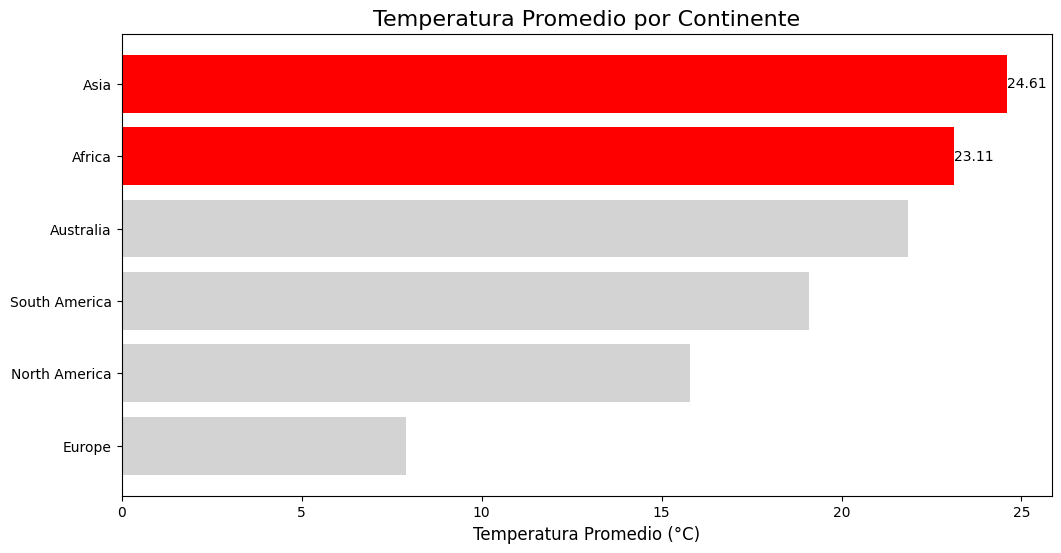

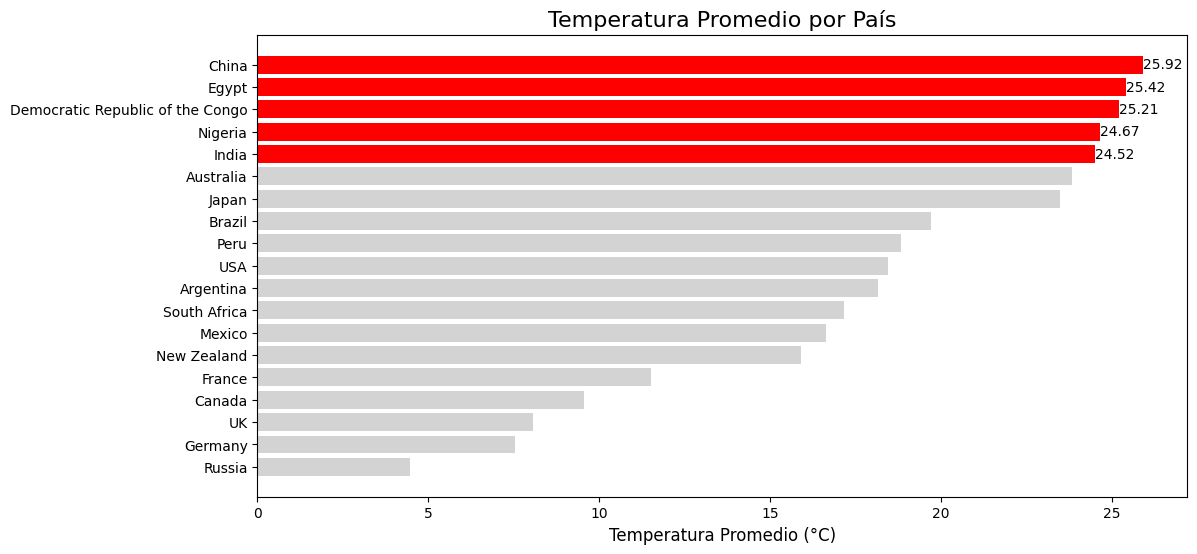

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos desde el CSV
csv_file = '../data/raw/weather_data.csv'
data = pd.read_csv(csv_file)

# Agrupar por continente y calcular estadísticas
continent_stats = data.groupby('Continent').agg({
    'Temperature (°C)': 'mean',
    'Humidity (%)': 'mean',
    'Wind Speed (m/s)': 'mean'
}).reset_index()

# Renombrar columnas para mayor claridad
continent_stats.columns = ['Continent', 'Avg Temperature (°C)', 'Avg Humidity (%)', 'Avg Wind Speed (m/s)']

# Ordenar por temperatura promedio de forma ascendente
continent_stats = continent_stats.sort_values(by='Avg Temperature (°C)', ascending=True)

# Determinar cuartiles para resaltar el cuarto cuartil
quartiles = pd.qcut(continent_stats['Avg Temperature (°C)'], 4, labels=False)
colors = ['lightgray' if q < 3 else 'red' for q in quartiles]

# Visualizar estadísticas por continente
plt.figure(figsize=(12, 6))
bars = plt.barh(continent_stats['Continent'], continent_stats['Avg Temperature (°C)'], color=colors)
plt.title('Temperatura Promedio por Continente', fontsize=16)
plt.xlabel('Temperatura Promedio (°C)', fontsize=12)
plt.grid(False)

# Agregar etiquetas de datos para el cuarto cuartil
for bar, q in zip(bars, quartiles):
    if q == 3:  # Solo para el cuarto cuartil
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
                 f'{bar.get_width():.2f}', va='center', ha='left', color='black')

plt.show()

# Agrupar por país y calcular estadísticas
country_stats = data.groupby('Country').agg({
    'Temperature (°C)': 'mean',
    'Humidity (%)': 'mean',
    'Wind Speed (m/s)': 'mean'
}).reset_index()

# Renombrar columnas para mayor claridad
country_stats.columns = ['Country', 'Avg Temperature (°C)', 'Avg Humidity (%)', 'Avg Wind Speed (m/s)']

# Ordenar por temperatura promedio de forma ascendente
country_stats = country_stats.sort_values(by='Avg Temperature (°C)', ascending=True)

# Determinar cuartiles para resaltar el cuarto cuartil
quartiles_country = pd.qcut(country_stats['Avg Temperature (°C)'], 4, labels=False)
colors_country = ['lightgray' if q < 3 else 'red' for q in quartiles_country]

# Visualizar estadísticas por país
plt.figure(figsize=(12, 6))
bars_country = plt.barh(country_stats['Country'], country_stats['Avg Temperature (°C)'], color=colors_country)
plt.title('Temperatura Promedio por País', fontsize=16)
plt.xlabel('Temperatura Promedio (°C)', fontsize=12)
plt.grid(False)

# Agregar etiquetas de datos para el cuarto cuartil
for bar, q in zip(bars_country, quartiles_country):
    if q == 3:  # Solo para el cuarto cuartil
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
                 f'{bar.get_width():.2f}', va='center', ha='left', color='black')

plt.show()


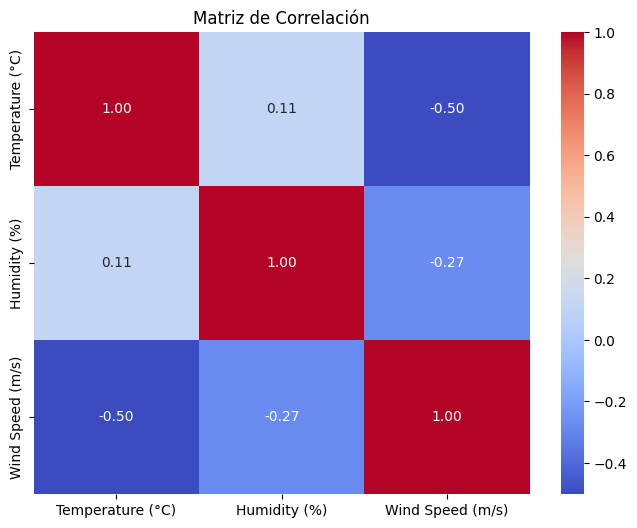

Matriz de correlación guardada en ../data/output/correlation_matrix.csv.
Datos de Temperatura vs Humedad guardados en ../data/output/scatter_temperature_humidity.csv.
Datos de Temperatura vs Velocidad del Viento guardados en ../data/output/scatter_temperature_wind.csv.


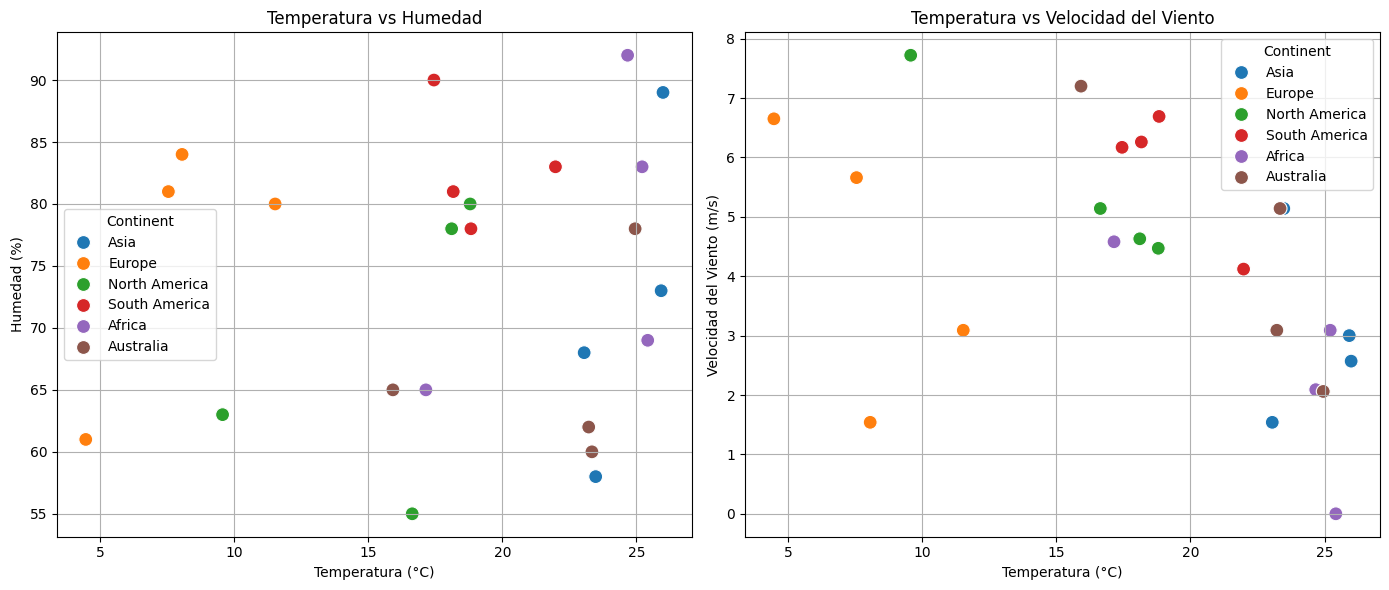

In [5]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = data[['Temperature (°C)', 'Humidity (%)', 'Wind Speed (m/s)']].corr()

# Crear un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

# Definir la ruta del archivo CSV para la matriz de correlación
correlation_matrix_file = '../data/output/correlation_matrix.csv'

# Crear el directorio si no existe
os.makedirs(os.path.dirname(correlation_matrix_file), exist_ok=True)

# Guardar la matriz de correlación en un archivo CSV
correlation_matrix.to_csv(correlation_matrix_file)

print(f"Matriz de correlación guardada en {correlation_matrix_file}.")

# Gráficos de dispersión: Temperatura vs Humedad y Temperatura vs Velocidad del Viento
# Preparar datos para los gráficos
scatter_data_humidity = data[['Temperature (°C)', 'Humidity (%)', 'Continent']]
scatter_data_wind = data[['Temperature (°C)', 'Wind Speed (m/s)', 'Continent']]

# Definir las rutas para los archivos CSV
scatter_humidity_file = '../data/output/scatter_temperature_humidity.csv'
scatter_wind_file = '../data/output/scatter_temperature_wind.csv'

# Crear el directorio si no existe
os.makedirs(os.path.dirname(scatter_humidity_file), exist_ok=True)
os.makedirs(os.path.dirname(scatter_wind_file), exist_ok=True)

# Guardar los datos de temperatura y humedad en un archivo CSV
scatter_data_humidity.to_csv(scatter_humidity_file, index=False)
print(f"Datos de Temperatura vs Humedad guardados en {scatter_humidity_file}.")

# Guardar los datos de temperatura y velocidad del viento en un archivo CSV
scatter_data_wind.to_csv(scatter_wind_file, index=False)
print(f"Datos de Temperatura vs Velocidad del Viento guardados en {scatter_wind_file}.")

# Configuración de la figura para gráficos de dispersión
plt.figure(figsize=(14, 6))

# Gráfico de dispersión: Temperatura vs Humedad
plt.subplot(1, 2, 1)
sns.scatterplot(data=scatter_data_humidity, x='Temperature (°C)', y='Humidity (%)', hue='Continent', palette='tab10', s=100)
plt.title('Temperatura vs Humedad')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Humedad (%)')
plt.grid(True)

# Gráfico de dispersión: Temperatura vs Velocidad del Viento
plt.subplot(1, 2, 2)
sns.scatterplot(data=scatter_data_wind, x='Temperature (°C)', y='Wind Speed (m/s)', hue='Continent', palette='tab10', s=100)
plt.title('Temperatura vs Velocidad del Viento')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Velocidad del Viento (m/s)')
plt.grid(True)

plt.tight_layout()
plt.show()


Estadísticas descriptivas guardadas en ../data/output/continent_weather_stats.csv.


/var/folders/kc/fprg47md0p36ch019m6frj0w0000gn/T/ipykernel_7554/1964896774.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Continent', y='Temperature (°C)', data=data, palette='pastel')
/var/folders/kc/fprg47md0p36ch019m6frj0w0000gn/T/ipykernel_7554/1964896774.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Continent', y='Humidity (%)', data=data, palette='pastel')
/var/folders/kc/fprg47md0p36ch019m6frj0w0000gn/T/ipykernel_7554/1964896774.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Continent', y='Wind Speed (m/s)'

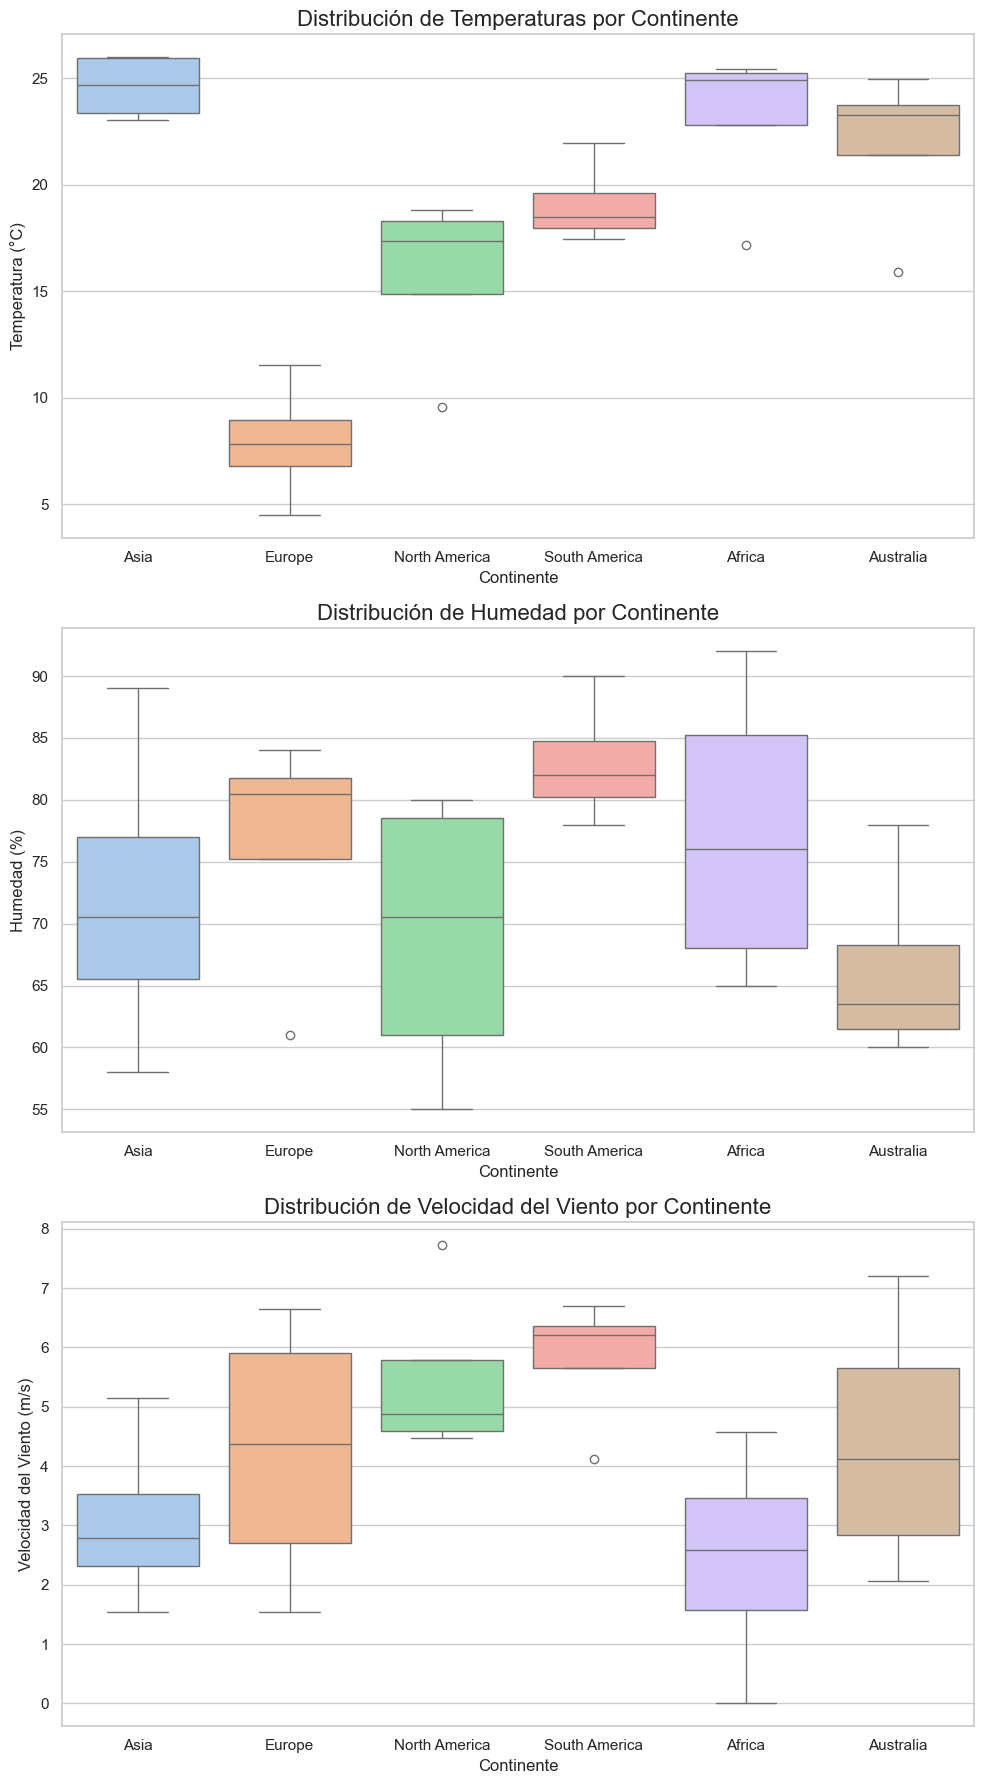

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Cargar los datos desde el CSV
csv_file = '../data/raw/weather_data.csv'
data = pd.read_csv(csv_file)

# Crear un directorio para guardar los resultados, si no existe
output_dir = '../data/output'
os.makedirs(output_dir, exist_ok=True)

# Calcular estadísticas descriptivas y guardar en CSV
stats = data.groupby('Continent').agg({
    'Temperature (°C)': ['mean', 'median', 'std', 'min', 'max'],
    'Humidity (%)': ['mean', 'median', 'std', 'min', 'max'],
    'Wind Speed (m/s)': ['mean', 'median', 'std', 'min', 'max']
}).reset_index()

# Renombrar columnas para mayor claridad
stats.columns = ['Continent', 
                 'Avg Temperature (°C)', 'Median Temperature (°C)', 'Std Temperature (°C)', 'Min Temperature (°C)', 'Max Temperature (°C)',
                 'Avg Humidity (%)', 'Median Humidity (%)', 'Std Humidity (%)', 'Min Humidity (%)', 'Max Humidity (%)',
                 'Avg Wind Speed (m/s)', 'Median Wind Speed (m/s)', 'Std Wind Speed (m/s)', 'Min Wind Speed (m/s)', 'Max Wind Speed (m/s)']

# Guardar las estadísticas en un archivo CSV
stats_file = os.path.join(output_dir, 'continent_weather_stats.csv')
stats.to_csv(stats_file, index=False)

print(f"Estadísticas descriptivas guardadas en {stats_file}.")

# Configuración de estilo de Seaborn
sns.set(style="whitegrid")

# Crear una figura para los gráficos de caja
plt.figure(figsize=(10, 18))

# Gráfico de caja para la Temperatura
plt.subplot(3, 1, 1)
sns.boxplot(x='Continent', y='Temperature (°C)', data=data, palette='pastel')
plt.title('Distribución de Temperaturas por Continente', fontsize=16)
plt.xlabel('Continente', fontsize=12)
plt.ylabel('Temperatura (°C)', fontsize=12)

# Gráfico de caja para la Humedad
plt.subplot(3, 1, 2)
sns.boxplot(x='Continent', y='Humidity (%)', data=data, palette='pastel')
plt.title('Distribución de Humedad por Continente', fontsize=16)
plt.xlabel('Continente', fontsize=12)
plt.ylabel('Humedad (%)', fontsize=12)

# Gráfico de caja para la Velocidad del Viento
plt.subplot(3, 1, 3)
sns.boxplot(x='Continent', y='Wind Speed (m/s)', data=data, palette='pastel')
plt.title('Distribución de Velocidad del Viento por Continente', fontsize=16)
plt.xlabel('Continente', fontsize=12)
plt.ylabel('Velocidad del Viento (m/s)', fontsize=12)

plt.tight_layout()
plt.show()
